In [2]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
data_dir = './AID'
classes = os.listdir(data_dir)

In [3]:
len(classes)

30

In [4]:
for root, dirs, imgs in os.walk(data_dir):
    print(len(root), len(dirs), len(imgs))

5 30 0
23 0 290
11 0 400
13 0 360
16 0 390
11 0 410
12 0 290
14 0 310
12 0 330
12 0 280
16 0 350
19 0 220
14 0 370
13 0 290
20 0 260
14 0 340
18 0 360
12 0 360
12 0 250
13 0 420
10 0 350
10 0 380
12 0 300
12 0 240
13 0 390
23 0 300
12 0 300
12 0 260
22 0 410
10 0 420
16 0 370


In [5]:
# Function to show random image from the dataset 

def random_sample(img_class='all'):
    """
    Returns random images from the dataset
    
    Parameters: 
        img_class: (str) can be 'all', or one of the image classes
        
        
    Returns:
        A random image sample from the data as a NumPy array
    """
    if img_class == 'all':
        class_name = random.choice(classes)
        class_dir = os.path.join(data_dir, class_name)
        imgs = os.listdir(class_dir)
        rndm_img_name = random.choice(imgs)
        img_path = os.path.join(class_dir, rndm_img_name)
        img = plt.imread(img_path)   
        
    elif img_class in classes:
        class_name = img_class
        class_dir = os.path.join(data_dir, class_name)
        imgs = os.listdir(class_dir)
        rndm_img_name = random.choice(imgs)
        img_path = os.path.join(class_dir, rndm_img_name)
        img = plt.imread(img_path)
    
    else:
        print("Please choose an appropriate value as 'img_class'")
    
    plt.imshow(img)
    plt.title(f"{class_name}{img.shape}")
    plt.axis(False)
    plt.show()
    
    return img

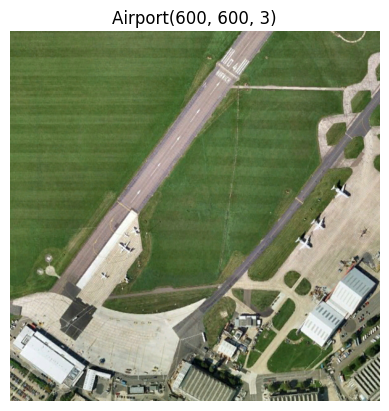

In [6]:
img = random_sample(img_class='Airport')

In [7]:
# How many images we have in each class
for c in classes:
    class_dir = os.path.join(data_dir, c)
    imgs = os.listdir(class_dir)
    print(f"There are {len(imgs)} images in '{c}' class")

There are 290 images in 'MediumResidential' class
There are 400 images in 'Beach' class
There are 360 images in 'Airport' class
There are 390 images in 'Industrial' class
There are 410 images in 'River' class
There are 290 images in 'Resort' class
There are 310 images in 'BareLand' class
There are 330 images in 'Square' class
There are 280 images in 'Meadow' class
There are 350 images in 'Commercial' class
There are 220 images in 'BaseballField' class
There are 370 images in 'Farmland' class
There are 290 images in 'Stadium' class
There are 260 images in 'RailwayStation' class
There are 340 images in 'Mountain' class
There are 360 images in 'StorageTanks' class
There are 360 images in 'Bridge' class
There are 250 images in 'Forest' class
There are 420 images in 'Viaduct' class
There are 350 images in 'Park' class
There are 380 images in 'Port' class
There are 300 images in 'School' class
There are 240 images in 'Church' class
There are 390 images in 'Parking' class
There are 300 images

In [10]:
!pip install split-folders
import splitfolders

In [11]:
# Create train, test and validation sets
splitfolders.ratio(data_dir, output='output')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen =  ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('./output/train',
                                               target_size=(600,600),
                                               batch_size=32, 
                                               class_mode='categorical', 
                                               seed=42)

val_data = val_datagen.flow_from_directory('./output/val', 
                                            target_size=(600,600), 
                                            batch_size=32, 
                                            class_mode='categorical', 
                                            seed=42)

test_data = test_datagen.flow_from_directory('./output/test',
                                             target_size=(600,600),
                                             batch_size=32,
                                             class_mode='categorical',
                                             seed=42)

Found 8000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, 
                           kernel_size=3,
                           strides=1,
                           activation='relu',
                           input_shape=(600,600,3)), # input shape acts as input layer 
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='softmax')
])

import mlflow
mlflow.autolog()

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

base_model_hist = model.fit(train_data,
                            epochs=10, 
                            steps_per_epoch=len(train_data),
                            validation_data=val_data, 
                            validation_steps=len(val_data))

2023-06-03 14:35:26.651000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 14:35:26.694898: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 14:35:26.695100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 14:35:26.695499: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10


2023-06-03 14:35:34.201557: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204


  1/250 [..............................] - ETA: 23:29 - loss: 4.1050 - accuracy: 0.0312

2023-06-03 14:35:36.984660: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-06-03 14:35:36.984700: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/250 [..............................] - ETA: 1:58 - loss: 4.2050 - accuracy: 0.0312 

2023-06-03 14:35:37.423966: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-06-03 14:35:37.424408: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2023-06-03 14:35:37.445818: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 189 callback api events and 186 activity events. 
2023-06-03 14:35:37.449313: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-06-03 14:35:37.453517: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /tmp/tmpy8dc1qoo/train/plugins/profile/2023_06_03_14_35_37

2023-06-03 14:35:37.456443: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /tmp/tmpy8dc1qoo/train/plugins/profile/2023_06_03_14_35_37/marvins-Lenovo-Legion-5-15ARH05H.trace.json.gz
2023-06-03 14:35:37.464976: I tensorflow/core/profiler/rpc/client/save_profile

250/250 [==============================] - 468s 2s/step - loss: 2.7626 - accuracy: 0.2142 - val_loss: 4.7189 - val_accuracy: 0.1040
Epoch 2/10
250/250 [==============================] - 466s 2s/step - loss: 2.1816 - accuracy: 0.3399 - val_loss: 3.3863 - val_accuracy: 0.2140
Epoch 3/10
250/250 [==============================] - 469s 2s/step - loss: 1.9687 - accuracy: 0.4055 - val_loss: 1.9275 - val_accuracy: 0.4220
Epoch 4/10
250/250 [==============================] - 472s 2s/step - loss: 1.8596 - accuracy: 0.4403 - val_loss: 2.1430 - val_accuracy: 0.3890
Epoch 5/10
250/250 [==============================] - 462s 2s/step - loss: 1.7604 - accuracy: 0.4559 - val_loss: 1.8616 - val_accuracy: 0.4570
Epoch 6/10
250/250 [==============================] - 467s 2s/step - loss: 1.6931 - accuracy: 0.4824 - val_loss: 2.0934 - val_accuracy: 0.3980
Epoch 7/10
250/250 [==============================] - 467s 2s/step - loss: 1.6155 - accuracy: 0.5073 - val_loss: 1.6284 - val_accuracy: 0.5010
Epoch 8/10

2023/06/03 15:53:30 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/06/03 15:53:30 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023-06-03 15:53:31.267923: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp_206yw74/model/data/model/assets


2023/06/03 15:53:35 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp_206yw74/model, flavor: tensorflow), fall back to return ['tensorflow==2.6.5']. Set logging level to DEBUG to see the full traceback.
2023/06/03 15:53:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    './output/train',
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

val_data = val_datagen.flow_from_directory(
    './output/val',
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

test_data = test_datagen.flow_from_directory(
    './output/test',
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

# Define the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(600, 600, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data))

# Evaluate the model
loss, accuracy = model.evaluate(test_data, steps=len(test_data))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 8000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.


2023-06-03 14:31:41.971870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 14:31:42.003482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 14:31:42.003673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 14:31:42.004648: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10


2023-06-03 14:31:47.399461: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2023-06-03 14:31:48.061801: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-06-03 14:31:48.061873: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-06-03 14:31:48.254045: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.39GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory

ResourceExhaustedError:  OOM when allocating tensor with shape[32,128,146,146] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradient_tape/sequential/max_pooling2d_2/MaxPool/MaxPoolGrad (defined at tmp/ipykernel_47352/3333881482.py:68) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1230]

Function call stack:
train_function


: 

In [5]:
model.evaluate(test_data)

32/32 [==============================] - 12s 367ms/step - loss: 1.3782 - accuracy: 0.5800


[1.3782148361206055, 0.5799999833106995]

In [5]:
def plot_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot Accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show();

In [8]:
plot_curves(base_model_hist)

TypeError: 'History' object is not subscriptable

In [6]:
mymodel = tf.keras.models.load_model("./models/mymodel1/1")

2023-06-03 17:14:54.235779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 17:14:54.268065: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 17:14:54.268371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 17:14:54.268741: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
mymodel.evaluate(test_data)

2023-06-03 17:15:49.442828: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-06-03 17:15:50.554195: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204


32/32 [==============================] - 14s 366ms/step - loss: 2.0859 - accuracy: 0.3380


[2.085934638977051, 0.33799999952316284]

In [9]:
plot_curves(mymodel)

TypeError: 'History' object is not subscriptable

: 

In [ ]:
import tensorflow_hub as hub

In [ ]:
# ImageNet V2 Feature Vector
mobilenet_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [ ]:
# Create data for the ImageNet model

mobilenet_train_data = train_datagen.flow_from_directory('/content/output/train',                                               
                                                        target_size=(600,600),
                                                        batch_size=32, 
                                                        class_mode='categorical', 
                                                        seed=42)

mobilenet_val_data = val_datagen.flow_from_directory('/content/output/val',                                               
                                                    target_size=(600,600),
                                                    batch_size=32, 
                                                    class_mode='categorical', 
                                                    seed=42)

mobilenet_test_data = test_datagen.flow_from_directory('/content/output/test',                                               
                                                      target_size=(600,600),
                                                      batch_size=32, 
                                                      class_mode='categorical', 
                                                      seed=42)

Found 8000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.


In [ ]:
# install the pretrained Imagenet model and save it as a Keras Layer (Sequential API)
feature_vector_layer = hub.KerasLayer(mobilenet_url,
                                      trainable=False,
                                      input_shape=(600,600,3))

mobilenet_model = tf.keras.Sequential([
    feature_vector_layer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(30, activation='softmax')
])

# compile the TL model
mobilenet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

ValueError: ignored

In [ ]:
mobilenet_history = mobilenet_model.fit(mobilenet_train_data,
                                      epochs=5, 
                                      steps_per_epoch=len(mobilenet_train_data),
                                      validation_data=mobilenet_val_data,
                                      validation_steps=len(mobilenet_val_data))

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
plot_curves(mobilenet_history)

In [ ]:
# Create MobileNet model with Functional API
mobilenet = tf.keras.applications.MobileNetV2(include_top=False)

# Freeze the bottom layers 
mobilenet.trainable = False 

inputs = tf.keras.layers.Input(shape=(600,600,3), name='input_layer')

x = mobilenet(inputs)
print(f"Shape after mobilenet CNN Model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pool_layer')(x)
print(f"Shape after GlobalAveragePooling Layer: {x.shape}")

x = tf.keras.layers.Dense(32, activation='relu', name='dense_layer_16')(x)
outputs = tf.keras.layers.Dense(30, activation='softmax', name='outputs_layer')(x)

# ImageNet Model (Functional API)
mobilenet_model = tf.keras.Model(inputs, outputs)

# Compile the model
mobilenet_model.compile(loss='categorical_crossentropy', 
                        optimizer=tf.keras.optimizers.Adam(), 
                        metrics=['accuracy'])

Shape after mobilenet CNN Model: (None, 18, 18, 1280)
Shape after GlobalAveragePooling Layer: (None, 1280)


In [ ]:
# Train Funtional MobileNet Model
mobilenet_model_hist = mobilenet_model.fit(mobilenet_train_data, 
                                           epochs=5, 
                                           steps_per_epoch=len(mobilenet_train_data),
                                           validation_data=mobilenet_val_data, 
                                           validation_steps=len(mobilenet_val_data)) 

Epoch 1/5
250/250 [==============================] - 2430s 10s/step - loss: 1.9085 - accuracy: 0.4865 - val_loss: 0.9883 - val_accuracy: 0.7290
Epoch 2/5
250/250 [==============================] - 2459s 10s/step - loss: 0.7836 - accuracy: 0.7815 - val_loss: 0.6932 - val_accuracy: 0.7860
Epoch 3/5
250/250 [==============================] - 2476s 10s/step - loss: 0.5691 - accuracy: 0.8415 - val_loss: 0.6262 - val_accuracy: 0.8100
Epoch 4/5
250/250 [==============================] - 2435s 10s/step - loss: 0.4626 - accuracy: 0.8712 - val_loss: 0.5490 - val_accuracy: 0.8190
Epoch 5/5
250/250 [==============================] - 2487s 10s/step - loss: 0.4023 - accuracy: 0.8824 - val_loss: 0.5175 - val_accuracy: 0.8340


In [ ]:
plot_curves(mobilenet_model_hist)

In [ ]:
for layer in mobilenet_model.layers:
    print(f"{layer.name}, {layer.trainable}")

In [ ]:
# Check out the layers of ImageNetV2 model
for layer_name in mobilenet_model.layers[1].layers:
    print(f"{layer_name.name}:  {layer_name.trainable}")

In [ ]:
mobilenet.trainable = True

# Freeze all layers except for the last ten
for layer in mobilenet.layers[:-1]:
    layer.trainable = False
    
# Recompile the mobilnet_model (Always recompile the model after making changes)
mobilenet_model.compile(loss='categorical_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

In [ ]:
# train the model for another 5 epochs
fine_tune_epochs = 5 + 5  # since we trained the model for 5 epochs already

fine_tuned_model_hist = mobilenet_model.fit(mobilenet_train_data,
                                            epochs=fine_tune_epochs,
                                            steps_per_epoch=len(mobilenet_train_data),
                                            validation_data=mobilenet_val_data,
                                            validation_steps=len(mobilenet_val_data),
                                            initial_epoch=mobilenet_model_hist.epoch[-1]) # start from previous last epoch

In [ ]:
mobilenet_model.evaluate(mobilenet_test_data)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
compare_historys(mobilenet_model_hist, fine_tuned_model_hist)

In [ ]:
!mkdir -p saved_model

In [ ]:
mobilenet_model.save('saved_model/my_model')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/saved_model/my_model')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the input image
img_path = '/content/plane.webp'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

In [ ]:
y_pred = loaded_model.predict(x)

In [ ]:
class_idx = np.argmax(y_pred[0])
class_label = 'class_label'
print(f'Predicted class: {classes[class_idx]}')

## **ResNet50V2**

In [ ]:
RANDOM_SEED: int = 42

In [ ]:
import random
import os
os.environ['PYTHONHASHSEED']= str(RANDOM_SEED)
random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
tf.experimental.numpy.random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [ ]:
!pip install split-folders[full]

In [ ]:
import splitfolders

splitfolders.ratio("/content/UCMerced_LandUse/Images/", output="/content/dataset_splitted/",
    seed=RANDOM_SEED, ratio=(0.8, 0.2,), group_prefix=None, move=False)

In [ ]:
DATASET_DIR: str = "/content/UCMerced_LandUse/Images/"

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk(DATASET_DIR):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
import pathlib
data_dir = pathlib.Path("/content/dataset_splitted/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])).tolist() # created a list of class_names from the subdirector
class_names

In [ ]:
# visualize random image from train set
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

target_class = random.choice(class_names)
target_folder: str = "/content/dataset_splitted/train/" + random.choice(class_names)

# Get a random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
img = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(img)
plt.title(target_class)

print(f"Image shape: {img.shape}")

In [ ]:
BATCH_SIZE: int = 32
EPOCHS: int = 5
AUGMENTATION_FACTOR: float = 0.2
LABEL_MODE: str = "categorical"
IMAGE_SIZE = (256, 256)

TRAIN_DIR: str = "/content/output/train"
TEST_DIR: str = "/content/output/val"

In [ ]:
from tensorflow.keras.layers import Dense, Input, RandomRotation, RandomFlip, RandomZoom, RandomHeight, RandomWidth, Rescaling, GlobalAveragePooling2D
from tensorflow.keras import Sequential

augmentation_layer = Sequential([
    RandomFlip("horizontal", seed=RANDOM_SEED),
    RandomRotation(AUGMENTATION_FACTOR, seed=RANDOM_SEED),
    RandomZoom(AUGMENTATION_FACTOR, seed=RANDOM_SEED),
    RandomHeight(AUGMENTATION_FACTOR, seed=RANDOM_SEED),
    RandomWidth(AUGMENTATION_FACTOR, seed=RANDOM_SEED),
    Rescaling(1/255.)
], name="augmentation_layer")

augmentation_layer

In [ ]:
target_dir = "/content/dataset_splitted/train"
target_class = random.choice(class_names)
target_dir = f"{target_dir}/{target_class}"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

print(random_image_path)
# Read in the random image
img = mpimg.imread(random_image_path)
plt.title(f"Origininal random image from class: {target_class}")
# plt.axis(False)
plt.imshow(img);

# Now lets plot our augmented random image
augmented_image = augmentation_layer(img, training=True)
plt.figure()
plt.title(f"augmented random image from class: {target_class}")
plt.imshow(augmented_image)

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)

base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False
input_layer = Input(shape=IMAGE_SIZE + (3, ), name="input_layer")
x = augmentation_layer(input_layer)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name="global_average_pooling2D")(x)
ouptut_layer = Dense(len(class_names), activation=tf.keras.activations.sigmoid, name="output_layer")(x)

model_1 = tf.keras.Model(input_layer, ouptut_layer)


In [ ]:
# compile the model
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
model_1.summary()

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + \
        datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback
    

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   shear_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen =  ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/content/dataset_splitted/train',
                                               target_size=(256,256),
                                               batch_size=32, 
                                               class_mode='categorical', 
                                               seed=42)


test_data = test_datagen.flow_from_directory('/content/dataset_splitted/val',
                                             target_size=(256,256),
                                             batch_size=32,
                                             class_mode='categorical',
                                             seed=42)

In [ ]:
history_1 = model_1.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        create_tensorboard_callback(dir_name="tensorboard", experiment_name="model_1")
    ]
)